In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib inline
import matplotlib.pyplot as pl
pl.ion()
import numpy as np
import sys
sys.path.append('../')

import os
import copy
from qiskit import *
from qiskit_utilities.utilities import *

from qiskit.visualization import plot_histogram

from newbeginning import *

In [2]:
backend = Aer.get_backend('statevector_simulator')

In [33]:
FR = np.array([[1,1, 0],
              [1,0, 1]])
CR=np.array([1,1,1])
# CR=np.random.rand(4)

# Normalize weights
CR = CR/np.max(CR)

In [78]:
eeo=np.array([[0],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0]],dtype=complex)
ooe=np.array([[0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [0]],dtype=complex)
eoe=np.array([[0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0]],dtype=complex)

In [ ]:
mixerbinstrings=['001<->110','01<->10_ind01','0<->1_ind2']

In [85]:
sv=1./np.sqrt(2)*(eeo+eoe).flatten()
mbs=['01<->10_ind12']

Optimization terminated successfully.
         Current function value: 1.500000
         Iterations: 6
         Function evaluations: 23


(0.0, 1.0)

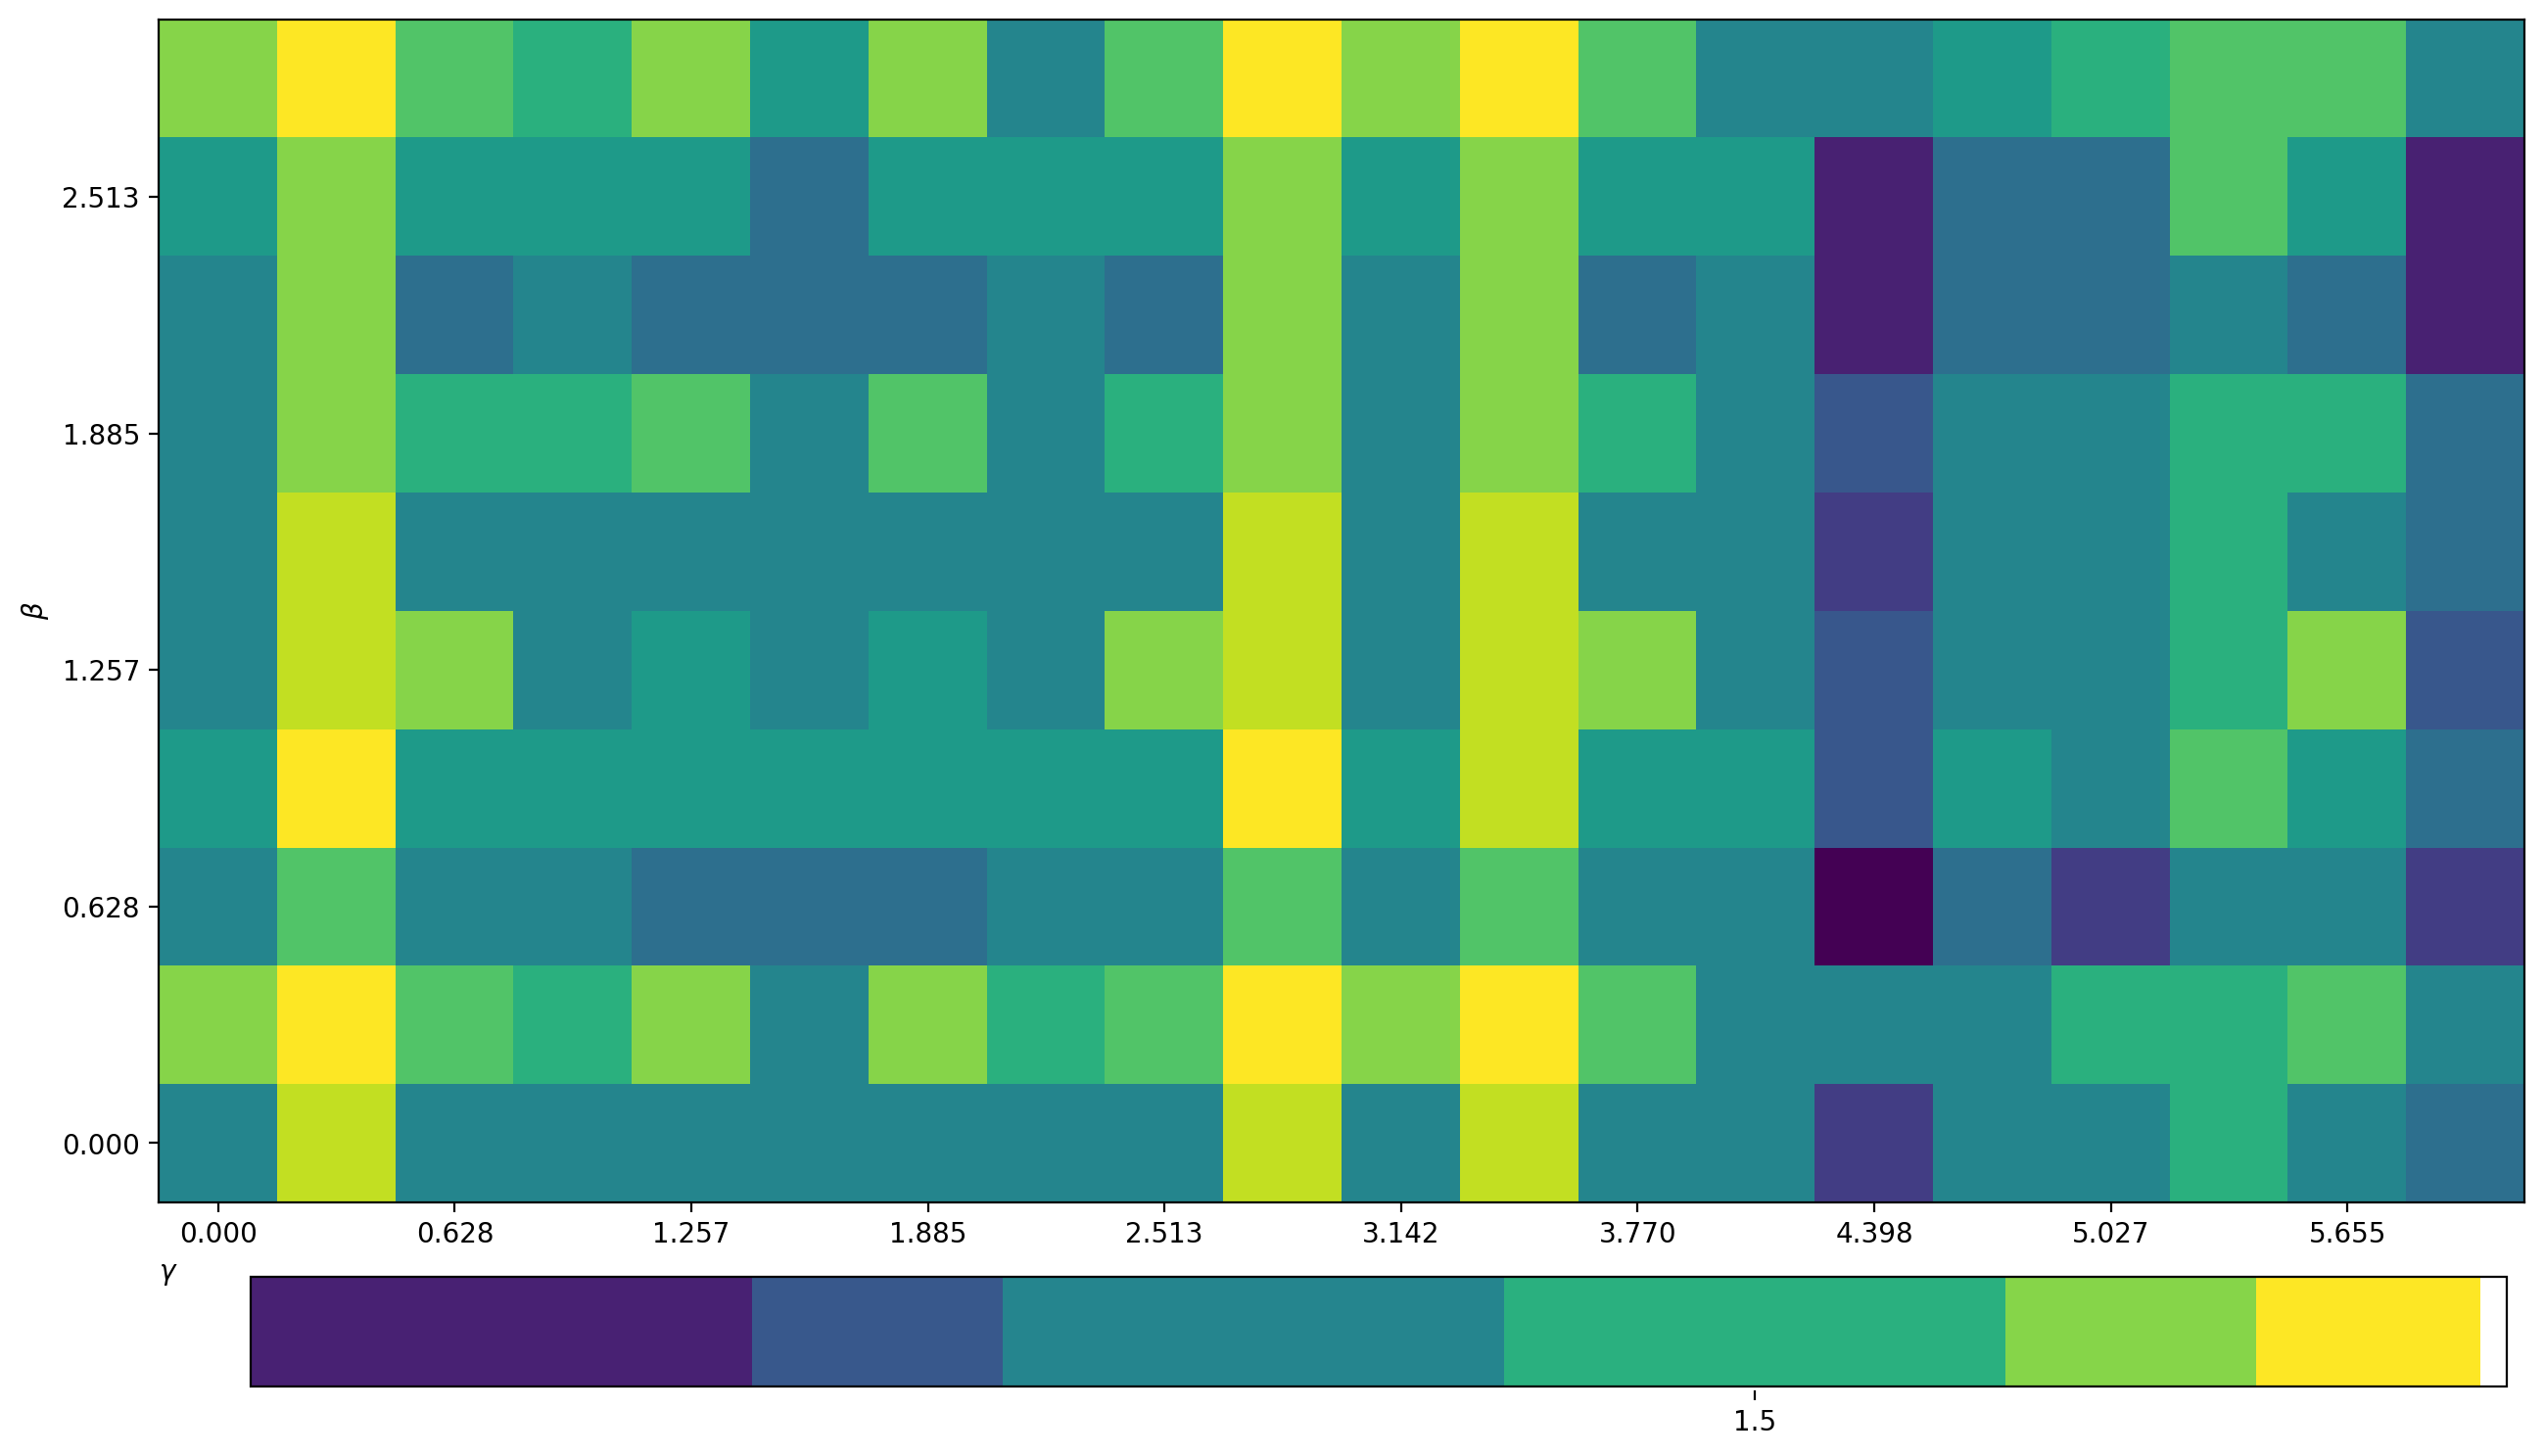

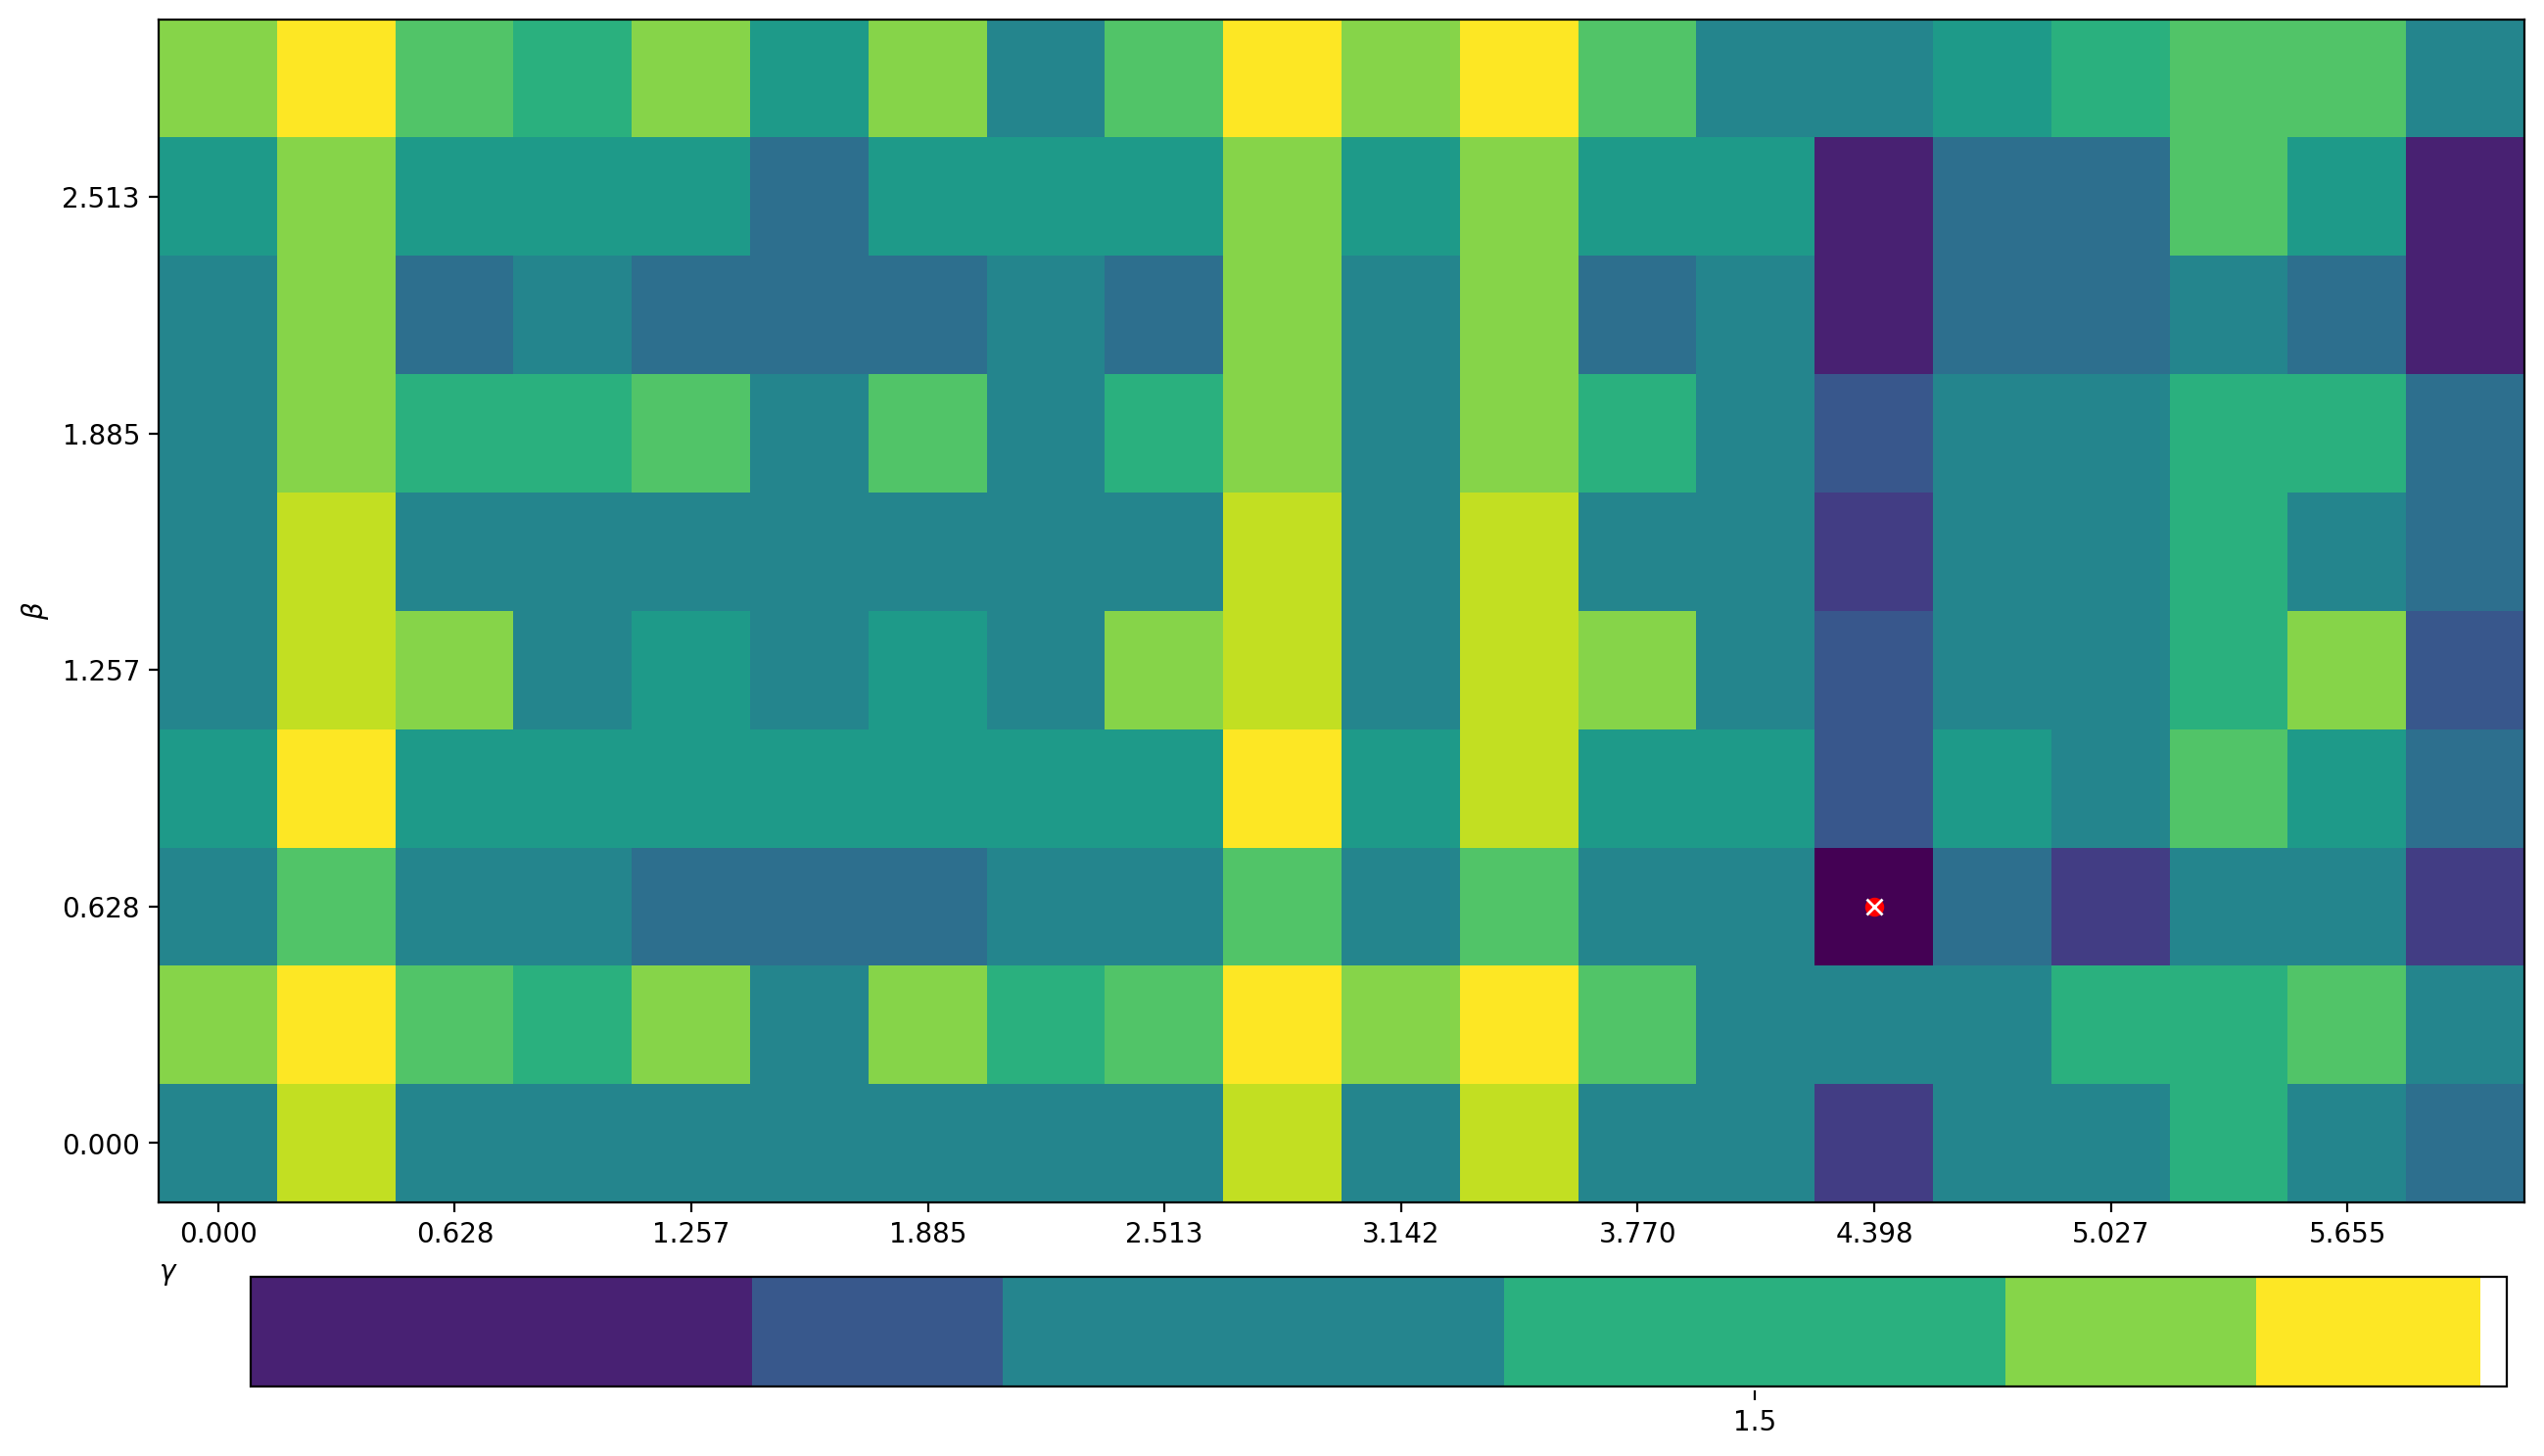

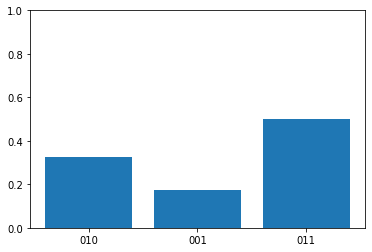

In [87]:
qaoa=QAOAChoose(CR, FR)

mu=0

E, Ecost, Eexco, x0, job, ji = qaoa.getElandscape(backend,mu,useExco=[False],sv=sv,mixerbinstrings=mbs,ng=20,nb=10)
out, job_b, xb = qaoa.getlocalmin(x0, backend, mu,useExco=[False],sv=sv, mixerbinstrings=mbs)

# plot landscape
_=getfig(Ecost,ng=20,nb=10)
# plot landscape
_=getfig(E,ng=20,nb=10)
pl.plot(x0[0],x0[1],'ro')
pl.plot(xb[0],xb[1],'wx')

# plot histogram
md=job_b.result().get_counts()
pl.figure()
pl.bar([k[::-1] for k in md.keys()], md.values())
pl.ylim([0,1])

In [44]:
qaoa.createCircuit(x0, useExco=[False],sv=sv,mixerbinstrings=['001<->110','01<->10_ind01','0<->1_ind2']).draw()

┌────────────────────────────────────────────────┐┌──────────┐ ░ ┌───┐»
q_0: ┤0                                               ├┤ RZ(3π/2) ├─░─┤ H ├»
     │                                                │├──────────┤ ░ ├───┤»
q_1: ┤1 initialize(0,0.57735,0.57735,0,0,0,0.57735,0) ├┤ RZ(3π/2) ├─░─┤ H ├»
     │                                                │├──────────┤ ░ ├───┤»
q_2: ┤2                                               ├┤ RZ(3π/2) ├─░─┤ H ├»
     └────────────────────────────────────────────────┘└──────────┘ ░ └───┘»
«          ┌───┐┌─────────────┐┌───┐┌───┐      ░ ┌───┐┌───┐     ┌───┐»
«q_0: ─────┤ X ├┤ RZ(-1.0996) ├┤ X ├┤ H ├──────░─┤ S ├┤ H ├─────┤ X ├»
«     ┌───┐└─┬─┘└─────────────┘└─┬─┘├───┤┌───┐ ░ ├───┤├───┤┌───┐└─┬─┘»
«q_1: ┤ X ├──■───────────────────■──┤ X ├┤ H ├─░─┤ S ├┤ H ├┤ X ├──■──»
«     └─┬─┘                         └─┬─┘├───┤ ░ ├───┤└───┘└─┬─┘     »
«q_2: ──■─────────────────────────────■──┤ H ├─░─┤ H ├───────■───────»
«                                        └───┘ ░ └───┘               »
«     ┌─────────────┐┌───┐┌───┐┌─────┐        ░ ┌───┐┌───┐     ┌───┐»
«q_0: ┤ RZ(-1.0996) ├┤ X ├┤ H ├┤ SDG ├────────░─┤ S ├┤ H ├─────┤ X ├»
«     └─────────────┘└─┬─┘├───┤└┬───┬┘┌─────┐ ░ ├───┤└───┘┌───┐└─┬─┘»
«q_1: ─────────────────■──┤ X ├─┤ H ├─┤ SDG ├─░─┤ H ├─────┤ X ├──■──»
«                         └─┬─┘ ├───┤ └─────┘ ░ ├───┤┌───┐└─┬─┘     »
«q_2: ──────────────────────■───┤ H ├─────────░─┤ S ├┤ H ├──■───────»
«                               └───┘         ░ └───┘└───┘          »
«     ┌─────────────┐┌───┐┌───┐┌─────┐        ░ ┌───┐          ┌───┐»
«q_0: ┤ RZ(-1.0996) ├┤ X ├┤ H ├┤ SDG ├────────░─┤ H ├──────────┤ X ├»
«     └─────────────┘└─┬─┘├───┤└┬───┬┘        ░ ├───┤┌───┐┌───┐└─┬─┘»
«q_1: ─────────────────■──┤ X ├─┤ H ├─────────░─┤ S ├┤ H ├┤ X ├──■──»
«                         └─┬─┘ ├───┤ ┌─────┐ ░ ├───┤├───┤└─┬─┘     »
«q_2: ──────────────────────■───┤ H ├─┤ SDG ├─░─┤ S ├┤ H ├──■───────»
«                               └───┘ └─────┘ ░ └───┘└───┘          »
«     ┌────────────┐┌───┐┌───┐             ░  ░ ┌──────────────┐»
«q_0: ┤ RZ(1.0996) ├┤ X ├┤ H ├─────────────░──░─┤0             ├»
«     └────────────┘└─┬─┘├───┤┌───┐┌─────┐ ░  ░ │  RXX(-7π/10) │»
«q_1: ────────────────■──┤ X ├┤ H ├┤ SDG ├─░──░─┤1             ├»
«                        └─┬─┘├───┤├─────┤ ░  ░ └──────────────┘»
«q_2: ─────────────────────■──┤ H ├┤ SDG ├─░──░─────────────────»
«                             └───┘└─────┘ ░  ░                 »
«     ┌──────────────┐┌──────────────┐┌──────────────┐ ░               ░ 
«q_0: ┤0             ├┤1             ├┤1             ├─░───────────────░─
«     │  RYY(-7π/10) ││  RXX(-7π/10) ││  RYY(-7π/10) │ ░               ░ 
«q_1: ┤1             ├┤0             ├┤0             ├─░───────────────░─
«     └──────────────┘└──────────────┘└──────────────┘ ░ ┌───────────┐ ░ 
«q_2: ─────────────────────────────────────────────────░─┤ RX(-7π/5) ├─░─
«                                                      ░ └───────────┘ ░